In [1]:
import pandas as pd

# Load the datasets
koi_data = pd.read_csv('koi_data.csv')
pca_results = pd.read_csv('pca_results.csv')

# Extract the label and the first 10 columns of PCA results
labels = koi_data['koi_disposition']
data_points = pca_results.iloc[:, :10]

# Create the new DataFrame
new_dataframe = pd.concat([labels, data_points], axis=1)
new_dataframe.head()

,koi_disposition,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,2,-2.464666,0.139996,-0.406526,-0.524790,0.431396,0.670933,-0.384116,0.480805,0.050458,-0.865757
1,2,-2.511276,1.086117,-0.571938,-0.619289,0.691540,0.836218,-0.628507,-0.251781,0.185579,-0.308088
2,1,-2.699170,0.395889,0.068670,0.012267,-0.006669,0.389748,-0.662824,1.022674,0.087414,-0.470393
3,0,-2.673031,-1.021171,0.924398,0.474307,-0.109842,0.100521,-0.025678,0.373335,0.313655,-1.982055
4,2,-2.601568,-0.580169,-0.108553,0.248668,-0.172969,0.706830,-0.811439,1.052848,0.496356,-1.570113


In [2]:
# Save the new dataframe as csv
new_dataframe.to_csv('new_dataframe.csv', index=False) 


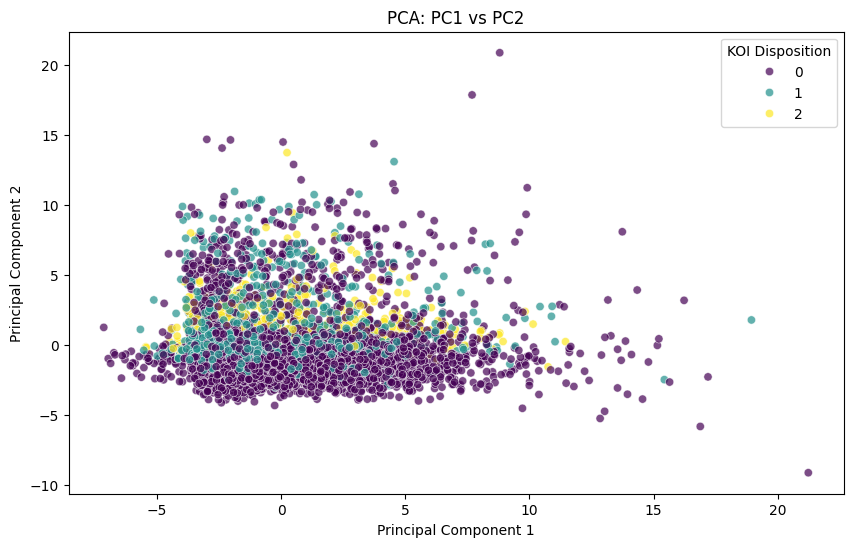

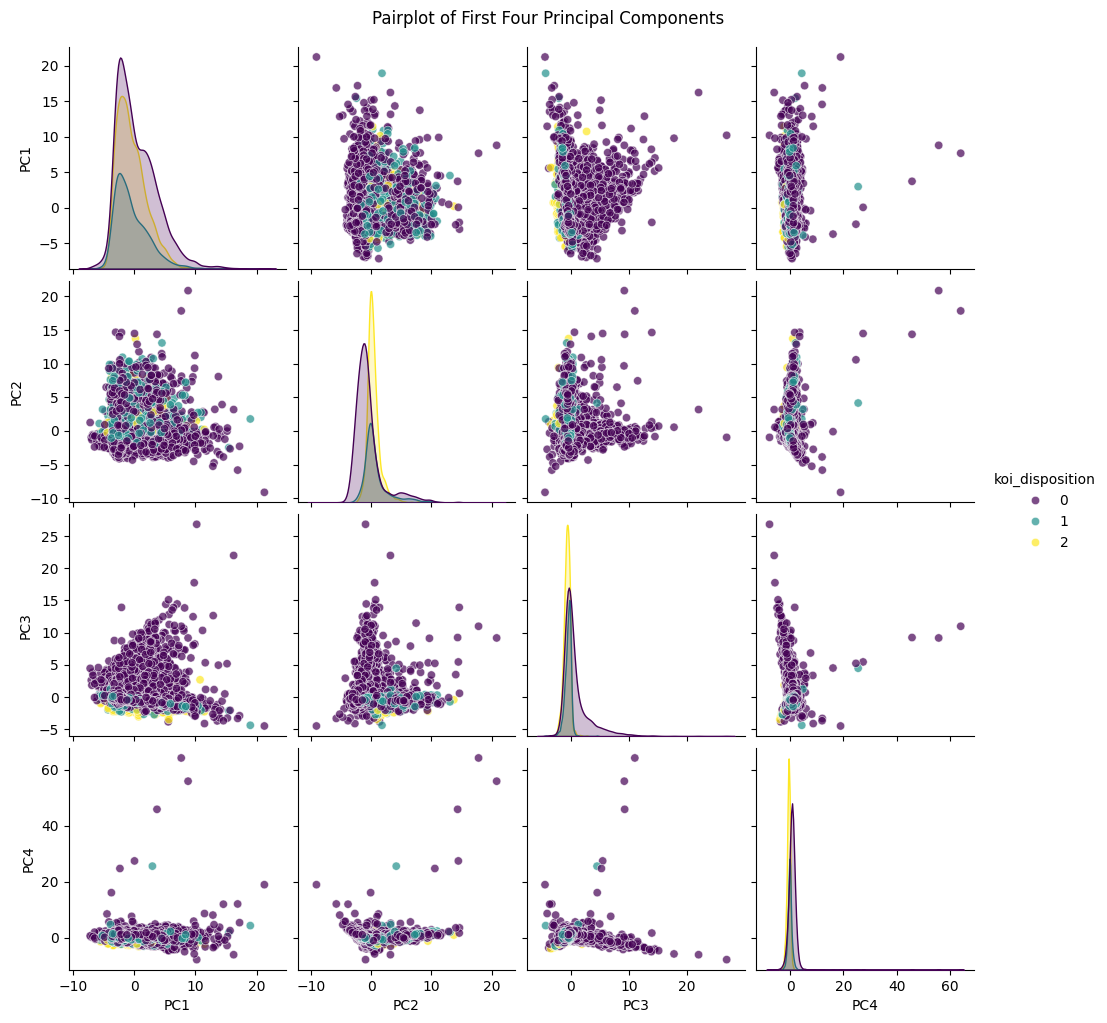

In [3]:
import seaborn as sns

import matplotlib.pyplot as plt

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=new_dataframe['PC1'], 
    y=new_dataframe['PC2'], 
    hue=new_dataframe['koi_disposition'], 
    palette='viridis', 
    alpha=0.7
)
plt.title('PCA: PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='KOI Disposition')
plt.show()

# Pairplot of the first four principal components
sns.pairplot(
    new_dataframe, 
    vars=['PC1', 'PC2', 'PC3', 'PC4'], 
    hue='koi_disposition', 
    palette='viridis', 
    diag_kind='kde', 
    plot_kws={'alpha': 0.7}
)
plt.suptitle('Pairplot of First Four Principal Components', y=1.02)
plt.show()

# Interactive Plots

In [7]:
fig = px.bar(
    x=[f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    y=explained_variance_ratio,
    title='Explained Variance by Principal Components',
    labels={'x': 'Principal Components', 'y': 'Explained Variance Ratio'},
    width=1000,  # Set the width of the figure
    height=600   # Set the height of the figure
)
fig.show()


In [10]:
# Interactive 3D scatter plot of the first three principal components with larger size
fig = px.scatter_3d(
    new_dataframe,
    x='PC1',
    y='PC2',
    z='PC3',
    color='koi_disposition',
    title='PCA: PC1 vs PC2 vs PC3',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
    opacity=0.7,
    color_continuous_scale='Viridis',
    width=1200,  # Set the width of the figure
    height=800   # Set the height of the figure
)
fig.update_traces(marker=dict(size=3))  # Reduce the size of the dots
fig.show()

In [12]:
import pandas as pd

# Example PCA loadings (replace with your actual loadings)
pca_loadings = pd.DataFrame(
    data=[[0.5, 0.3, 0.2], [0.4, 0.1, 0.7], [0.6, 0.5, 0.1]],
    columns=['PC1', 'PC2', 'PC3'],
    index=['Feature1', 'Feature2', 'Feature3']
)

fig = px.imshow(
    pca_loadings,
    text_auto=True,
    color_continuous_scale='Viridis',
    title='PCA Loadings Heatmap',
    labels={'x': 'Principal Components', 'y': 'Features', 'color': 'Loading Value'},
    width=1200,  # Set the width of the figure
    height=800   # Set the height of the figure
)
fig.show()